## **Random Forest Forecasting**

Random Forest를 활용한 2006년 ~ 2017년의 미국 주식 거래량 TOP 20 주식 가격 예측

In [ ]:
# 필요한 package 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!git clone https://github.com/KU-DIC/LG_time_series_day06.git

Cloning into 'LG_time_series_day06'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [ ]:
# import dataset

data = pd.read_csv('/content/LG_time_series_day06/Data_random_forest_stock_prediction.csv')
data.head()

,Unnamed: 0,Date,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGL,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
0,0,2006-01-03,39.69,10.34,47.47,51.70,70.40,57.87,17.21,57.25,24.08,35.10,211.47,126.70,40.39,82.45,25.19,61.07,39.83,20.40,34.29,77.76,32.52,26.25,10.85,23.65,58.30,44.85,62.60,56.45,30.20,46.36,56.42
1,1,2006-01-04,41.22,10.73,47.48,52.44,70.08,57.95,17.48,59.08,24.50,35.35,222.17,127.35,40.94,82.20,25.60,61.93,39.78,20.50,33.43,79.49,32.75,26.77,10.71,23.97,58.80,45.99,61.89,56.80,30.57,46.24,58.60
2,2,2006-01-05,40.93,10.69,47.16,51.90,70.55,59.02,17.94,58.68,24.13,35.27,223.22,126.00,40.10,81.40,25.93,62.57,39.61,20.36,33.82,78.41,32.92,26.96,10.69,24.55,58.70,46.79,62.23,56.30,31.28,46.00,58.57
3,3,2006-01-06,42.88,10.75,47.97,52.64,70.34,59.47,18.51,58.95,24.65,35.38,228.66,127.29,40.25,83.95,26.48,62.36,39.92,20.53,34.23,78.64,33.09,26.89,10.79,24.70,58.74,47.00,62.75,56.45,31.60,45.69,58.76
4,4,2006-01-09,43.10,10.96,46.55,52.82,69.28,60.45,18.97,59.49,24.85,35.40,233.44,128.50,40.80,84.10,26.39,62.52,39.88,20.74,34.00,78.50,33.22,26.93,10.72,24.98,58.45,46.71,62.90,56.37,31.39,45.89,59.80


In [ ]:
del data['Unnamed: 0']
data.columns 

Index(['Date', 'AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX',
       'DIS', 'GE', 'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
       'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX',
       'VZ', 'WMT', 'XOM'],
      dtype='object')

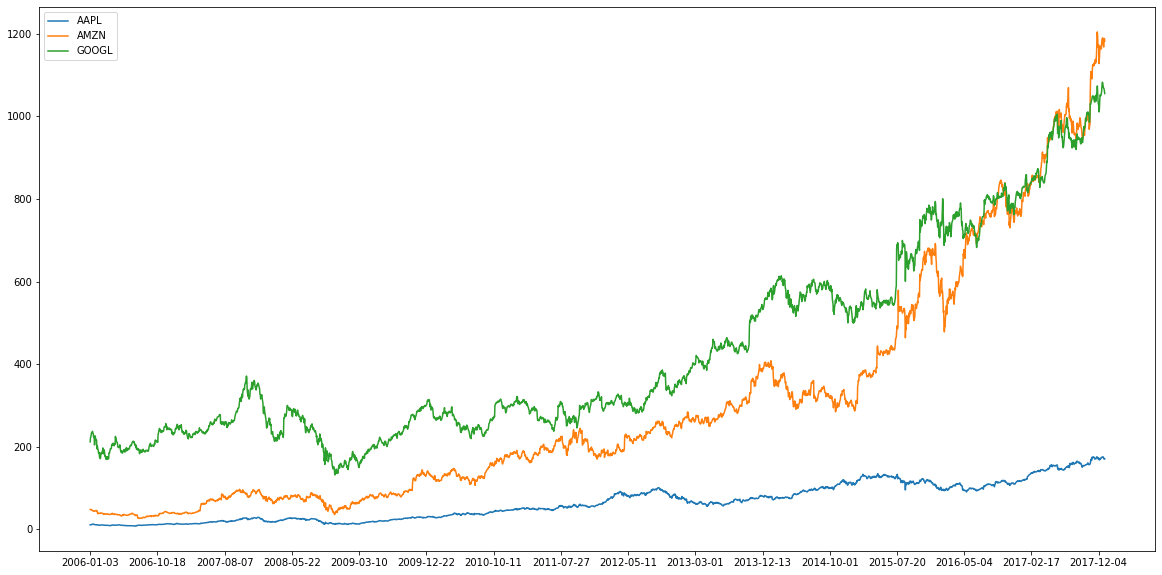

In [ ]:
# visualize the data

plt.figure(figsize=(20,10))
plt.plot(data['Date'].astype('str'),data['AAPL'], label='AAPL')
plt.plot(data['Date'].astype('str'),data['AMZN'], label='AMZN')
plt.plot(data['Date'].astype('str'),data['GOOGL'], label='GOOGL')
plt.legend()
plt.xticks(range(0, 3020, 200))

plt.show()

In [ ]:
data = data.set_index("Date") # set datetime as the index of dataframe
data = data.dropna() # drop the missing values
columns = data.columns

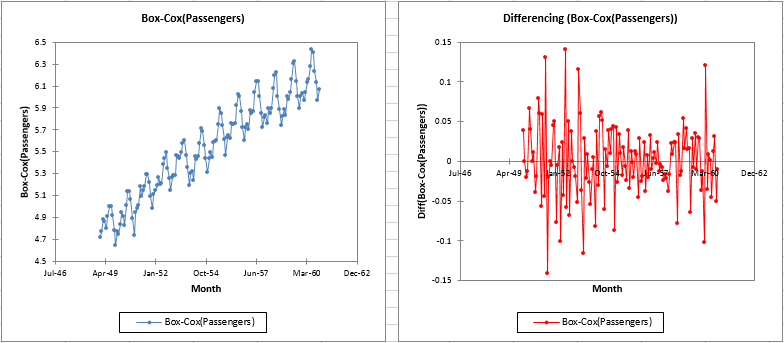

In [ ]:
# make a feature "diff" which means the variations of stocks between today and yesterday

data_diff = pd.DataFrame(columns = columns)
data_diff['Date'] = data.index

for col in columns:
    data_diff[col] = pd.DataFrame(np.diff(data[col])) # np.diff() : differentiation between stock of today and stock of yesterday

data_diff = data_diff.dropna()

In [ ]:
data_diff

,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGL,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM,Date
0,1.53,0.39,0.01,0.74,-0.32,0.08,0.27,1.83,0.42,0.25,10.70,0.65,0.55,-0.25,0.41,0.86,-0.05,0.10,-0.86,1.73,0.23,0.52,-0.14,0.32,0.50,1.14,-0.71,0.35,0.37,-0.12,2.18,2006-01-03
1,-0.29,-0.04,-0.32,-0.54,0.47,1.07,0.46,-0.40,-0.37,-0.08,1.05,-1.35,-0.84,-0.80,0.33,0.64,-0.17,-0.14,0.39,-1.08,0.17,0.19,-0.02,0.58,-0.10,0.80,0.34,-0.50,0.71,-0.24,-0.03,2006-01-04
2,1.95,0.06,0.81,0.74,-0.21,0.45,0.57,0.27,0.52,0.11,5.44,1.29,0.15,2.55,0.55,-0.21,0.31,0.17,0.41,0.23,0.17,-0.07,0.10,0.15,0.04,0.21,0.52,0.15,0.32,-0.31,0.19,2006-01-05
3,0.22,0.21,-1.42,0.18,-1.06,0.98,0.46,0.54,0.20,0.02,4.78,1.21,0.55,0.15,-0.09,0.16,-0.04,0.21,-0.23,-0.14,0.13,0.04,-0.07,0.28,-0.29,-0.29,0.15,-0.08,-0.21,0.20,1.04,2006-01-06
4,-0.14,-0.07,-0.14,0.76,-0.48,0.90,-0.10,-0.73,0.17,-0.13,-1.00,1.55,0.24,-0.95,-0.10,0.00,0.62,-0.15,0.61,0.50,0.23,-0.28,0.09,-0.25,0.44,0.34,-1.45,0.07,0.41,-0.39,-0.60,2006-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0.42,0.51,-3.82,-0.66,-0.65,0.76,-0.36,1.11,-1.90,-0.17,-5.39,-2.26,0.89,-0.48,-1.21,-0.67,-1.01,-0.07,-1.23,-2.20,0.52,-0.65,-0.10,-0.45,-0.14,-0.57,0.01,-0.12,-0.30,-0.45,0.75,2017-12-21
3011,-0.48,-3.88,-3.72,-0.58,-1.72,2.08,0.03,3.46,-0.23,0.05,-1.36,5.05,0.57,-1.35,-0.05,-0.59,1.61,-0.45,-0.78,-0.64,-0.11,-0.09,-3.09,-0.27,0.22,-1.18,-1.12,0.27,0.30,-0.71,0.53,2017-12-22
3012,-1.17,-0.70,11.55,0.33,-0.79,1.27,-0.01,0.38,-1.00,-0.06,-2.04,-3.47,0.07,0.69,-0.17,-0.54,-1.00,0.01,-0.73,-0.28,-0.10,0.34,1.70,-0.18,0.47,0.20,-2.91,-0.07,0.02,0.06,0.08,2017-12-26
3013,0.35,0.90,9.09,0.10,0.87,0.90,0.19,0.73,-0.07,0.01,-4.35,-0.21,2.07,0.44,0.25,-0.04,-0.53,0.20,0.24,0.44,-0.05,0.25,0.66,0.22,0.14,0.03,0.89,0.01,0.28,1.21,0.03,2017-12-27


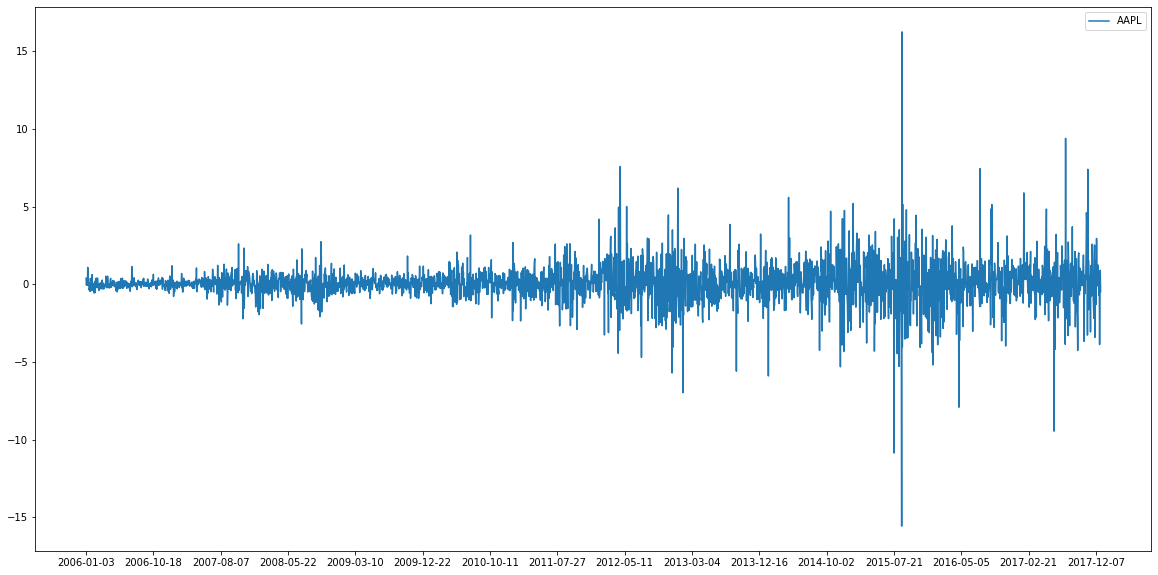

In [ ]:
# visualize the diff of AAPL (example)

plt.figure(figsize = (20,10))
plt.plot(data_diff['Date'].astype('str'),data_diff['AAPL'], label='AAPL')
plt.legend()
plt.xticks(range(0, 3020, 200))

plt.show()

In [ ]:
# make features from (t-5) time to (t) time using "AAPL" colum

lags = pd.DataFrame()

for i in range(5,0,-1):
    lags['t-'+str(i)] = data_diff["AAPL"].shift(i) # make columns; (t-i) time
    lags['t'] = data_diff['AAPL'].values

lags = lags[5:]

In [ ]:
lags

,t-5,t,t-4,t-3,t-2,t-1
5,0.39,1.09,-0.04,0.06,0.21,-0.07
6,-0.04,0.16,0.06,0.21,-0.07,1.09
7,0.06,0.00,0.21,-0.07,1.09,0.16
8,0.21,0.10,-0.07,1.09,0.16,0.00
9,-0.07,-0.37,1.09,0.16,0.00,0.10
...,...,...,...,...,...,...
3010,1.23,0.51,1.25,0.11,-0.12,-0.70
3011,1.25,-3.88,0.11,-0.12,-0.70,0.51
3012,0.11,-0.70,-0.12,-0.70,0.51,-3.88
3013,-0.12,0.90,-0.70,0.51,-3.88,-0.70


In [ ]:
# Rolling mean for smoothing the previous 80 days (example: AAPL)

data_mean = data['AAPL'].rolling(window = 80).mean() # 앞 80일의 평균을 현재 값으로 사용
data_mean = data_mean.dropna()

In [ ]:
data_mean

Date
2006-04-27      9.972000
2006-04-28      9.966625
2006-05-01      9.958875
2006-05-02      9.950500
2006-05-03      9.944375
                 ...    
2017-12-22    164.524000
2017-12-26    164.613500
2017-12-27    164.679750
2017-12-28    164.770375
2017-12-29    164.868000
Name: AAPL, Length: 2937, dtype: float64

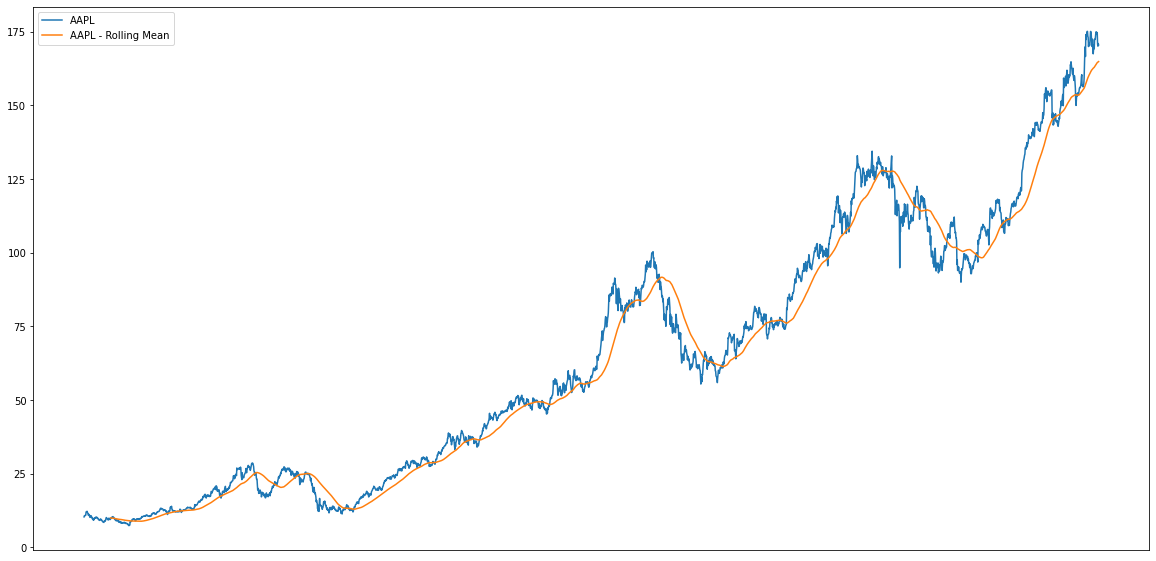

In [ ]:
# visualize the smoothing data

plt.figure(figsize=(20,10))
plt.plot(data.index,data['AAPL'], label='AAPL')
plt.plot(data_mean, label='AAPL - Rolling Mean')
plt.plot()
plt.legend()
plt.xticks([])

plt.show()

In [ ]:
# Rolling mean for all features

columns = data.columns
data_mean = pd.DataFrame(columns=columns)
for col in columns:
    data_mean[col] = data[col].rolling(window = 80).mean()
data_mean = data_mean.dropna()

In [ ]:
data_mean

,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGL,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-04-27,33.721000,9.972000,39.187000,52.978125,74.751875,70.589625,20.042250,58.443500,26.899375,33.848125,198.497375,146.025875,41.316500,81.866000,21.023000,59.302250,40.841125,20.835625,34.985750,76.029000,34.512625,27.052875,10.587625,25.389000,58.835375,43.564375,57.121250,58.131125,33.077250,46.069750,60.919000
2006-04-28,33.635875,9.966625,39.040750,53.002250,74.925375,70.810000,20.089625,58.484125,26.944750,33.840500,198.473000,146.489750,41.314750,81.879250,20.958000,59.272000,40.894500,20.843125,34.989625,76.119500,34.536375,27.027625,10.580375,25.404625,58.835375,43.551875,56.938750,58.227375,33.116875,46.060000,60.995875
2006-05-01,33.533000,9.958875,38.887125,53.020250,75.092500,71.038125,20.133875,58.515875,26.988625,33.823875,198.313875,146.901625,41.304875,81.884125,20.888750,59.231750,40.964500,20.849875,35.004750,76.194750,34.560375,26.997000,10.574625,25.423750,58.830750,43.527000,56.781375,58.304875,33.147875,46.056000,61.055875
2006-05-02,33.423875,9.950500,38.730625,53.032750,75.263875,71.249625,20.173750,58.552000,27.035750,33.812875,198.032875,147.296625,41.314875,81.893000,20.810125,59.184250,41.031875,20.858500,35.012000,76.279000,34.576875,26.966125,10.569250,25.430000,58.817750,43.504625,56.619750,58.390500,33.170625,46.057500,61.121500
2006-05-03,33.292875,9.944375,38.559625,53.030375,75.452125,71.480625,20.212750,58.599375,27.077000,33.798375,197.654250,147.699250,41.314250,81.875375,20.723125,59.136375,41.102750,20.865375,35.015125,76.355375,34.594500,26.929875,10.561875,25.437125,58.786625,43.489375,56.439250,58.483000,33.183750,46.065375,61.194500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,68.506375,164.524000,1062.338625,92.735125,262.447000,132.608375,34.716625,116.658750,101.634625,21.372000,1007.822375,239.398500,167.253000,150.203000,41.548375,137.204875,98.330875,45.931125,164.861625,223.623250,60.042750,79.822125,55.755375,35.626750,90.605375,128.728875,207.094625,118.317625,48.610625,87.839875,81.645250
2017-12-26,68.586875,164.613500,1064.759375,92.898750,263.138750,133.091500,34.797250,116.874625,101.722250,21.284750,1009.351625,239.916125,167.733750,150.310000,41.690125,137.317375,98.542750,45.935250,165.029375,224.028750,59.957000,79.963125,55.860375,35.661625,90.602875,128.872500,207.414875,118.424750,48.670375,88.083250,81.740750
2017-12-27,68.656875,164.679750,1067.205750,93.058750,263.820500,133.567625,34.876250,117.090000,101.790875,21.197750,1010.715750,240.352875,168.207750,150.428625,41.826000,137.430750,98.735125,45.939000,165.170875,224.413250,59.864500,80.099875,55.989125,35.694000,90.608625,129.033125,207.691875,118.522500,48.731250,88.330125,81.836875


**Modeling part**

In [ ]:
# aggregating the features (pre-processing)

df_forecasting = pd.DataFrame(data["AAPL"])
df_forecasting["AAPL_diff"] = df_forecasting["AAPL"].diff()

for i in range(5,0,-1):
    df_forecasting['t-'+str(i)] = df_forecasting["AAPL"].shift(i)
df_forecasting = df_forecasting.dropna()

df_forecasting["AAPL_rolling"] = df_forecasting["AAPL"].rolling(window = 80).mean()
df_forecasting = df_forecasting.dropna()

In [ ]:
# set X (using colum 1) and Y value
x = df_forecasting.iloc[:,1:]
y = df_forecasting.iloc[:,0]

# split train and valid data
x_train, x_valid = x.loc[x.index < '2017-10-01'], x.loc[x.index >= '2017-10-01'] 
y_train, y_valid = y.loc[y.index < '2017-10-01'], y.loc[y.index >= '2017-10-01'] # 2017년 10월 1일을 기준으로 앞 데이터를 학습 데이터, 뒤 데이터를 검증 데이터로 사용

# define the Random Forest model
mdl = RandomForestRegressor(n_estimators=100) # 모델 정의

# train the RF model
mdl.fit(x_train, y_train) # train
pred = mdl.predict(x_valid) # prediction
pred = pd.Series(pred, index = y_valid.index)

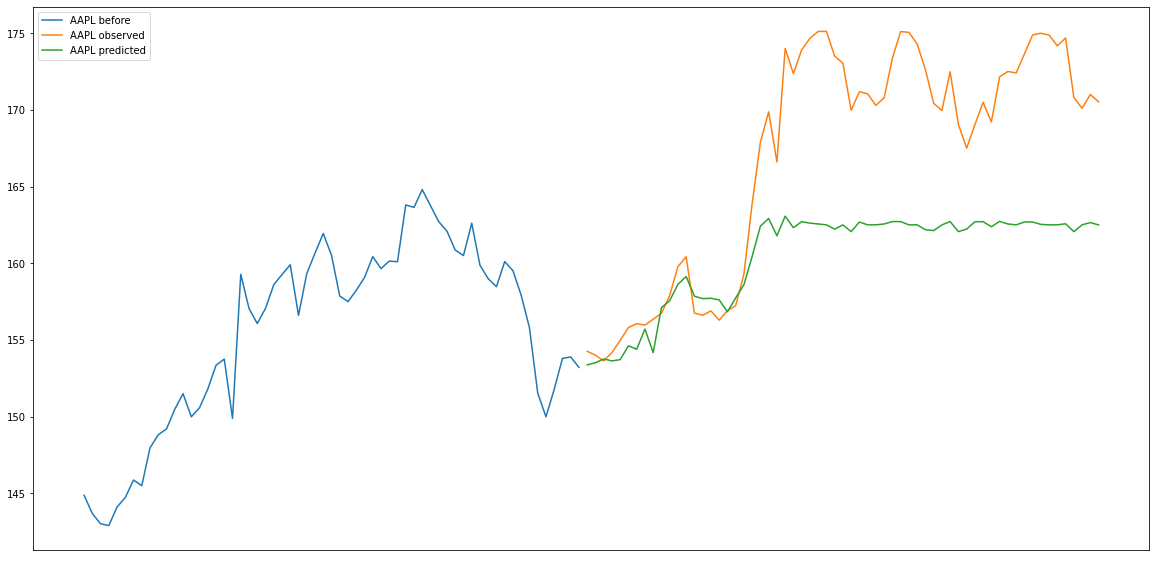

In [ ]:
# visualize the predicted data

plt.figure(figsize = (20,10))
plt.plot(y_train.loc[y_train.index > '2017-07-01'], label = 'AAPL before')
plt.plot(y_valid.index, y_valid.values, label = 'AAPL observed')
plt.plot(pred.index, pred.values, label = 'AAPL predicted')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error
score = []
predict = pd.DataFrame()

for c in data.columns: # for all columns
    
    # pre-processing data
    df_forecasting = pd.DataFrame(data[c])
    df_forecasting["var_diff"] = df_forecasting[c].diff() 
    for i in range(5,0,-1): 
        df_forecasting['t-'+str(i)] = df_forecasting[c].shift(i) 
    df_forecasting=df_forecasting.dropna()
    df_forecasting["var_rolling"] = df_forecasting[c].rolling(window = 80).mean() 
    df_forecasting= df_forecasting.dropna()
    
    # set X and Y value 
    x = df_forecasting.iloc[:,1:]
    y = df_forecasting.iloc[:,0]
    
    # split the train and valid data
    x_train, x_valid = x.loc[x.index < '2017-10-01'], x.loc[x.index >= '2017-10-01']
    y_train, y_valid = y.loc[y.index < '2017-10-01'], y.loc[y.index >= '2017-10-01'] # 2017년 10월 1일을 기준으로 앞 데이터를 학습 데이터, 뒤 데이터를 검증 데이터로 사용
    
    # modeling RF
    mdl = RandomForestRegressor(n_estimators=100) 
    mdl.fit(x_train, y_train) 
    pred = mdl.predict(x_valid) 
    predict[c+"_valid"] = y_valid.values 
    predict[c+"_predict"] = pred 
    
    # calculate the accuracy (score)
    s = mdl.score(x_valid, y_valid)
    score.append([c, s])

predict = predict.set_index(y_valid.index)
pred = pd.Series(pred, index = y_valid.index)
score = pd.DataFrame(score, columns=["Asset", "Score"])
score = score.set_index("Asset")

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        predict

,AABA_valid,AABA_predict,AAPL_valid,AAPL_predict,AMZN_valid,AMZN_predict,AXP_valid,AXP_predict,BA_valid,BA_predict,CAT_valid,CAT_predict,CSCO_valid,CSCO_predict,CVX_valid,CVX_predict,DIS_valid,DIS_predict,GE_valid,GE_predict,GOOGL_valid,GOOGL_predict,GS_valid,GS_predict,HD_valid,HD_predict,IBM_valid,IBM_predict,INTC_valid,INTC_predict,JNJ_valid,JNJ_predict,JPM_valid,JPM_predict,KO_valid,KO_predict,MCD_valid,MCD_predict,MMM_valid,MMM_predict,MRK_valid,MRK_predict,MSFT_valid,MSFT_predict,NKE_valid,NKE_predict,PFE_valid,PFE_predict,PG_valid,PG_predict,TRV_valid,TRV_predict,UNH_valid,UNH_predict,UTX_valid,UTX_predict,VZ_valid,VZ_predict,WMT_valid,WMT_predict,XOM_valid,XOM_predict
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-02,66.60,65.9908,154.26,153.6118,964.00,963.8928,90.04,89.8594,253.85,254.8702,125.35,124.7336,33.61,33.5764,117.17,117.1102,97.89,98.0859,24.22,24.2845,975.65,968.8009,235.01,237.8138,162.50,160.4153,145.45,145.4753,38.12,37.9533,129.58,130.7021,95.30,94.4444,44.86,44.9892,157.51,155.7140,209.06,209.7032,64.21,64.2070,74.71,74.3639,52.59,52.5747,35.64,35.4580,90.97,91.0485,122.62,122.5960,195.82,194.7373,115.32,115.2537,49.30,49.3317,78.85,78.7924,81.94,81.8338
2017-10-03,67.19,66.6322,154.01,153.8078,958.00,964.1846,90.44,90.3315,254.65,255.1471,124.40,124.2993,33.72,33.7699,116.42,116.3455,99.31,99.0004,24.22,24.2385,967.56,968.3797,237.20,238.4160,164.20,160.3949,145.35,145.0616,38.95,38.0449,130.16,131.0089,95.77,94.8793,45.05,45.0729,156.00,157.5856,210.73,210.1368,64.55,64.5627,74.67,74.2242,52.16,52.1587,35.67,35.8005,91.26,91.2433,122.87,122.9702,196.59,195.0930,116.14,116.1814,49.39,49.3875,77.90,78.0700,81.30,81.1880
2017-10-04,67.79,66.7716,153.63,153.8951,954.21,955.3452,90.59,90.5838,255.99,255.2373,124.98,124.6975,33.53,33.6086,117.08,117.1680,100.05,99.9211,24.61,24.6255,971.76,966.1978,241.07,240.5885,164.06,160.2564,146.69,146.4443,39.39,38.0597,131.65,131.6147,96.83,95.0009,44.86,44.9013,156.75,155.2656,212.62,211.0285,64.42,64.2847,74.09,74.0931,52.00,51.9818,36.02,35.9319,91.96,91.5763,123.31,123.2806,197.50,196.9351,118.00,117.6948,49.45,49.4713,78.83,78.7515,81.41,81.4487
2017-10-05,67.75,66.6136,154.18,153.6770,970.00,960.6029,91.60,91.3237,256.12,255.3609,125.69,124.8957,33.58,33.6745,117.82,117.6872,100.74,100.3585,24.88,24.9147,972.79,974.2307,241.62,241.7030,165.49,160.3707,147.00,146.8832,39.50,37.9413,132.40,131.7177,97.30,94.9682,45.11,45.1366,156.83,157.3112,214.85,213.5126,64.42,64.2040,75.22,74.4452,51.51,51.5904,36.18,36.0908,92.12,91.9079,123.71,123.6212,199.03,197.5918,117.87,117.7534,49.64,49.6103,79.27,79.5325,81.80,81.8167
2017-10-06,67.49,66.5076,154.97,154.1631,975.64,976.2030,90.96,90.8720,255.28,255.2787,126.80,124.6353,33.65,33.7312,117.45,117.4089,100.64,101.1458,24.39,24.4233,980.00,976.9396,241.00,241.0344,165.07,160.1710,146.68,146.8796,39.60,37.9871,132.89,132.5726,96.00,93.9739,45.51,45.3397,157.30,157.4965,216.49,213.0807,64.70,64.5559,75.67,74.7817,52.01,51.9690,35.88,35.9481,92.49,92.3947,123.98,124.1120,199.93,197.4112,117.63,117.5312,49.96,49.9236,79.17,79.1335,81.72,81.7653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,71.42,66.4880,174.68,162.5686,1172.08,1029.5067,99.05,94.3268,298.05,254.9219,152.69,124.8059,38.52,33.9237,121.39,121.1866,109.72,109.5199,17.46,17.4763,1070.00,985.1479,256.61,250.1426,187.89,160.3707,153.17,153.4959,46.33,37.0068,141.59,134.3784,106.59,94.2307,46.14,46.1456,172.60,158.5835,236.00,211.7333,56.60,56.6480,85.40,74.4370,64.29,64.2942,36.54,36.4169,91.66,91.8944,135.88,128.5258,223.12,197.4146,127.25,123.0449,52.81,52.7398,99.00,88.1435,83.35,83.3906
2017-12-26,70.94,66.1669,170.80,162.1242,1168.36,1029.5067,98.47,94.4987,296.33,254.8981,154.77,124.6787,38.55,34.2115,124.85,122.7061,

In [ ]:
score

,Score
Asset,
AABA,-3.122978
AAPL,-0.143574
AMZN,-0.460946
AXP,0.384394
BA,-1.146730
CAT,-2.686032
CSCO,-0.615387
CVX,0.972603
DIS,0.977284


In [ ]:
score.sort_values(by='Score', ascending=False) # sorting for top accuracy

,Score
Asset,
VZ,0.997135
XOM,0.993580
NKE,0.993085
GE,0.990254
MRK,0.983256
PG,0.980666
DIS,0.977284
CVX,0.972603
IBM,0.922448


In [ ]:
print("Max is:", score[score["Score"]==score.max()[0]].index) # predicted well
print("Min is:", score[score["Score"]==score.min()[0]].index) # predicted (not good)

Max is: Index(['VZ'], dtype='object', name='Asset')
Min is: Index(['INTC'], dtype='object', name='Asset')


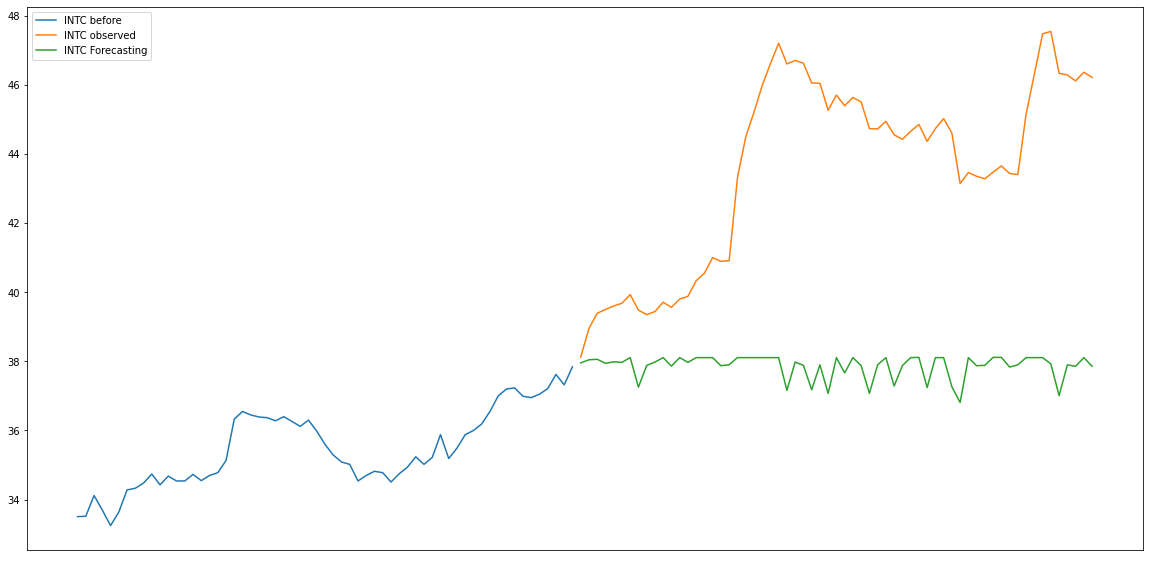

In [ ]:
# visualize the worst prediction (INTC)

plt.figure(figsize = (20,10))
plt.plot(data["INTC"].loc['2017-07-01':'2017-10-01'], label = 'INTC before')
plt.plot(predict["INTC_valid"], label = 'INTC observed')
plt.plot(predict["INTC_predict"], label = 'INTC Forecasting')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()

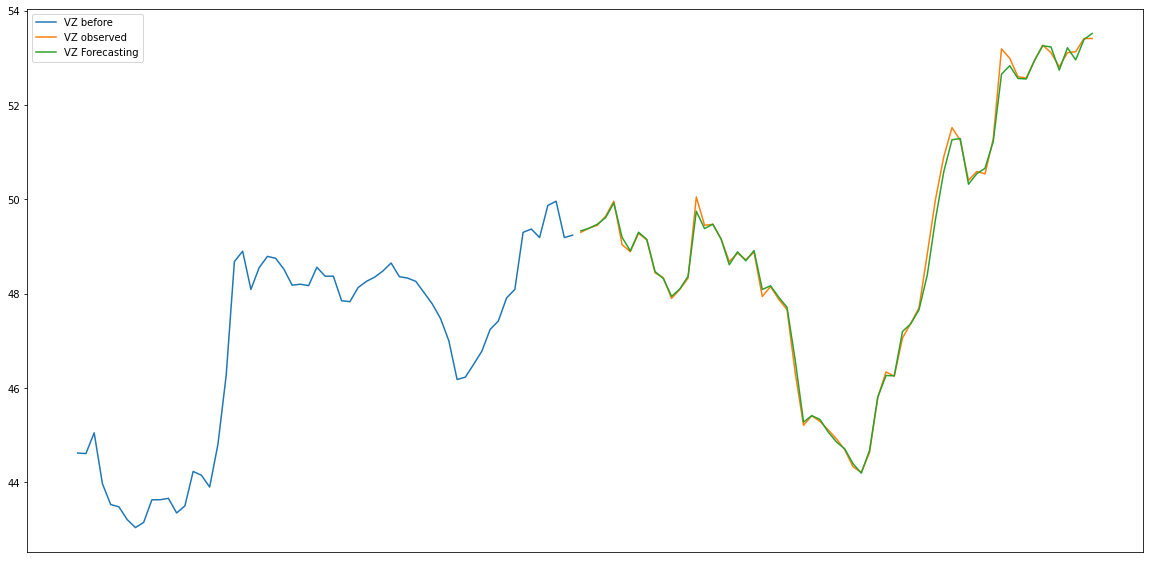

In [ ]:
# visualize the best prediction (VZ)

plt.figure(figsize = (20,10))
plt.plot(data["VZ"].loc['2017-07-01':'2017-10-01'], label = 'VZ before')
plt.plot(predict["VZ_valid"], label = 'VZ observed')
plt.plot(predict["VZ_predict"], label = 'VZ Forecasting')
plt.plot()
plt.legend()
plt.xticks([])
plt.show()